# DCCF Analysis

This notebooks uses DCCFs to detect correlations/anticorrelations between two sets of time-series data.

The specific use case is measuring the correlations between Gamma-ray and Radio light curves of 12 blazars: accreting supermassive black holes with their jets aligned along our line-of-sight.

After computing DCCFs, the significance of (anti-)correlated lags is determined using confidence intervals; these are computed by simulating fake gamma-ray light curves, using DCCFs to assess their correlation with the radio light curve, and then computing the probability of a chance correlation. Simulation of fake light curves is done using the methods in Emmanloupoulus et al. (2013): 

https://ui.adsabs.harvard.edu/abs/2013MNRAS.433..907E/abstract;
https://ui.adsabs.harvard.edu/abs/2015arXiv150306676C/abstract

### Firstly, import modules

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import yaml
import sys
from glob import glob
import copy, os, re, pickle
sys.path.append('model_files/')
from lc import *
with open(f'config.yaml') as f:
	choices = yaml.load(f, Loader=yaml.FullLoader)

### Pick the first blazar as an example: 3c454.3

In [6]:
designation, name = list(choices['NAMES'].items())[0]
print (designation, name)

F1 3c454.3


### Load up the Gamma-ray & Radio Light Curves, and plot

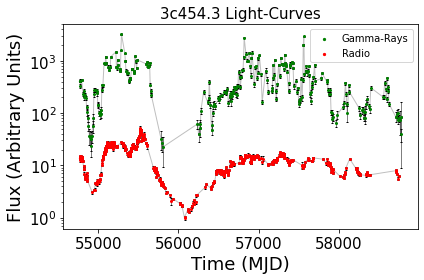

In [8]:
#Load up individual light curves
lcG,lcR = load_data(designation,name)

#Create LCpair object for DCCF analysis
lcpair  = LCpair(choices,lcG,lcR,designation,name)

#Plot the light curves
lcpair.plot_lcs()

### Next, compute the Discrete Cross Correlation Function

In [9]:
lcpair.compute_DCCF()

### Now, using simulated light curves from methods Emmanoloupoulus (2013), compute confidence intervals

In [10]:
lcpair.compute_confidence_intervals()

### Finally, plot up the DCCF with the 1,2,3 $\sigma$ confidence intervals overlayed

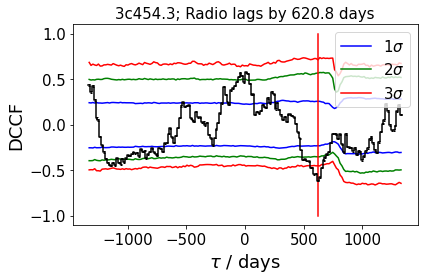

In [11]:
lcpair.plot_DCCF()